# Possum Regression
## Regression project for learning purposes

## Main Question
### Can we predict a possum's head length by use other parameters?

# Importing the neccessary liblaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and reading of data

In [2]:
possum = pd.read_csv('possum.csv', sep=',', index_col='case')
possum

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0


In [3]:
possum.nunique()

site         7
Pop          2
sex          2
age          9
hdlngth     71
skullw      64
totlngth    34
taill       19
footlgth    75
earconch    69
eye         35
chest       19
belly       24
dtype: int64

In [4]:
possum.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


# Categorical Variable Transformation
### Label Encoding

Pop 0=Vic   1=other

sex 0=male   1=female

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
possum['Pop'] = le.fit_transform(possum['Pop'])
possum['sex'] = le.fit_transform(possum['sex'])

# Data Cleaning

### Is there any missing value in our data?

In [6]:
possum.shape

(104, 13)

In [7]:
possum.isnull().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

There are 2 missing value in the "age" column and 1 in the "footlgth" column.  
Now we going to fill these columns with their averages.

In [8]:
for column in possum.columns:
    if possum[column].isnull().sum() > 0:
        possum[column].fillna(possum[column].mean(), inplace=True)

In [9]:
possum.isnull().sum()

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [10]:
list(possum.columns[3:]).index('age')

0

## Visualization

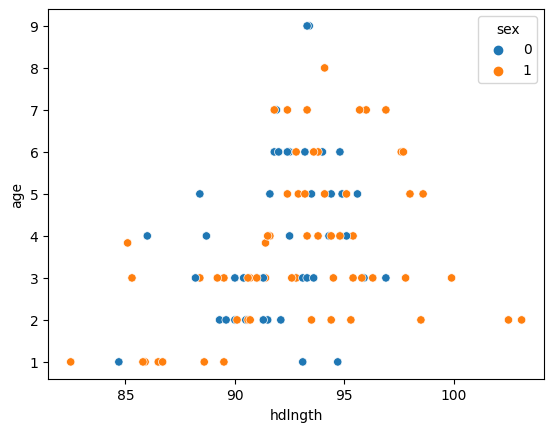

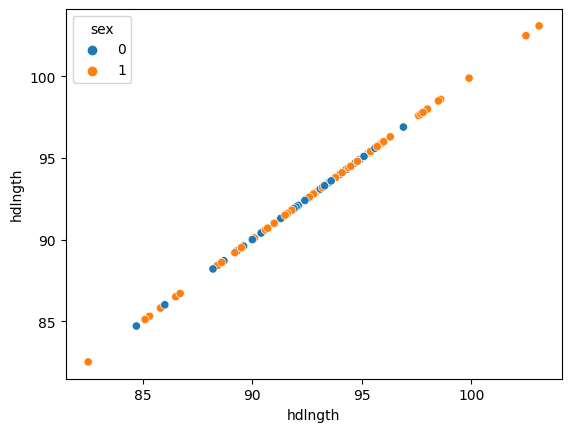

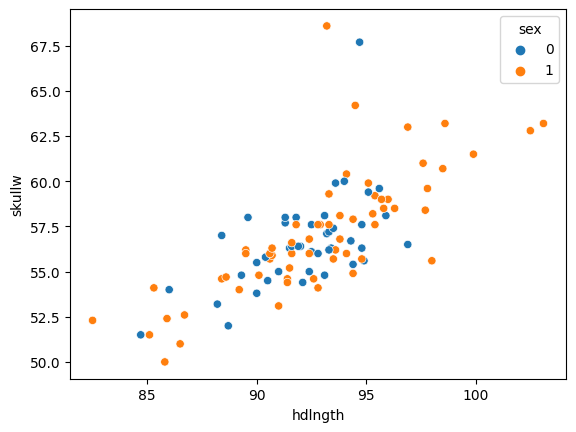

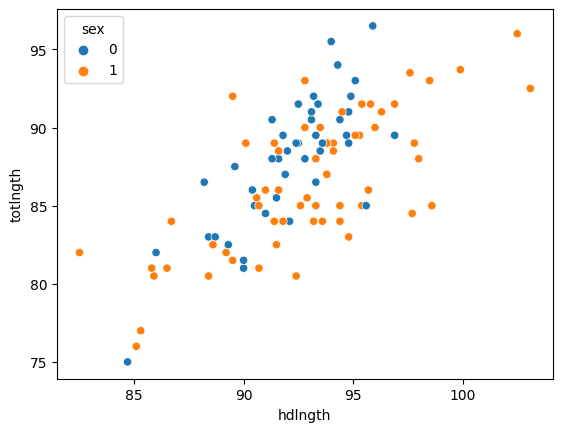

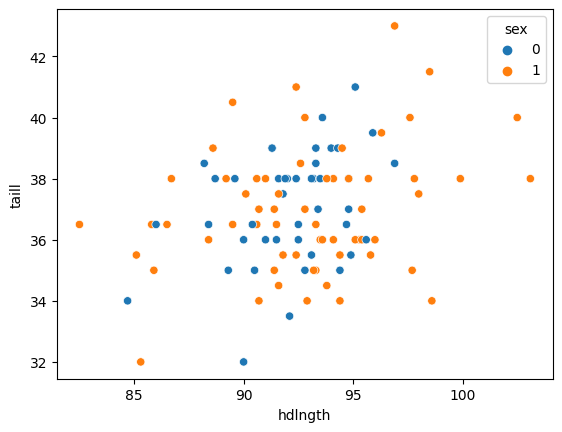

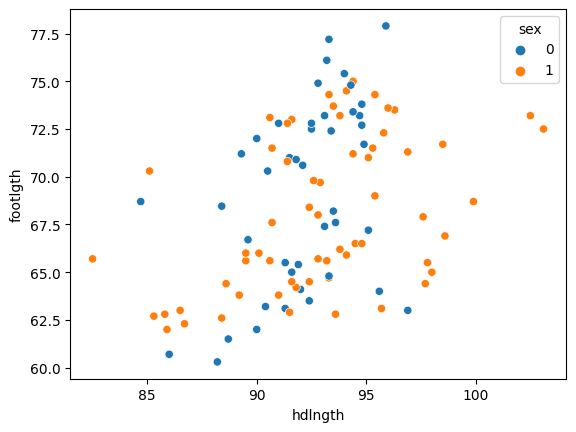

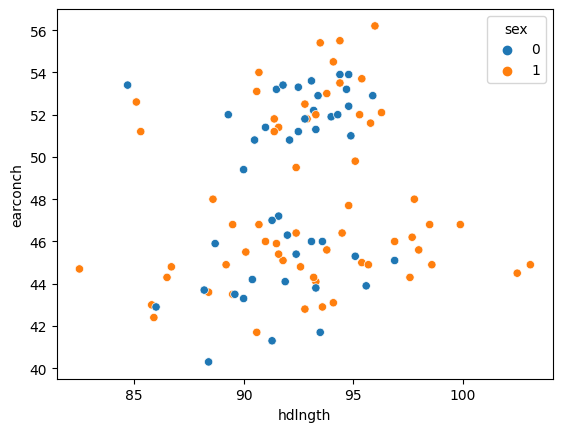

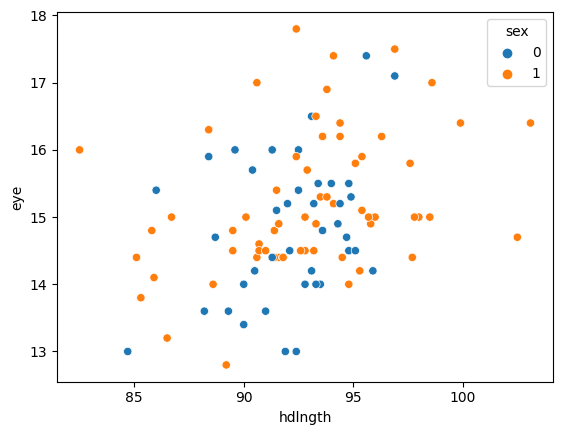

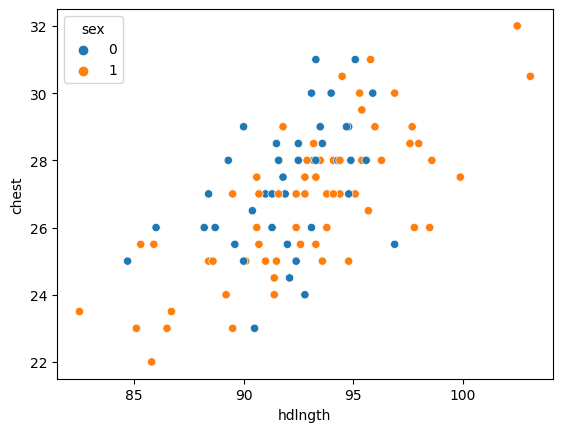

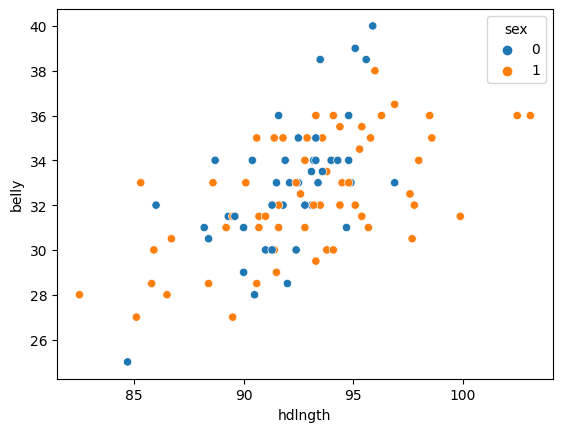

In [11]:
%matplotlib inline
for column in possum.columns[3:]:
    sns.scatterplot(data=possum, x="hdlngth", y=column, hue="sex")
    plt.show()

There are some outliers, we should clean them.

## Outlier Detection

### 3 Sigma

In [12]:
for column in possum.columns[3:]:
    for siteNumb in possum['site'].unique():
        selected_site = possum[possum['site'] == siteNumb]
        selected_column = selected_site[column]

        std = selected_column.std()
        avg = selected_column.mean()

        three_sigma_plus = avg + (3 * std)
        three_sigma_minus = avg - (3 * std)

        outliers = selected_column[((selected_site[column] > three_sigma_plus) | (selected_site[column] < three_sigma_minus))].index

        possum.drop(index=outliers, inplace=True)

        #print(column, siteNumb, outliers)


In [13]:
possum.shape

(102, 13)

## Train - Test Split

In [14]:
possum.dtypes

site          int64
Pop           int32
sex           int32
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [15]:
x = possum.drop(possum.columns[4], axis=1).values
y = possum.iloc[:,4:5].values

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1985)

# Building Model
### Multiple Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

multi_regressor = LinearRegression()
multi_regressor.fit(x_train,y_train)

y_predict_multi = multi_regressor.predict(x_test)

### Multiple Linear Regression R^2 Score

In [18]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict_multi)

0.8148644724645446

### P Values

In [19]:
import statsmodels.api as sm

pModel = sm.OLS(y_predict_multi,x_test)
print(pModel.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.570e+05
Date:                Mon, 31 Jul 2023   Prob (F-statistic):                    2.05e-22
Time:                        21:31:46   Log-Likelihood:                          3.6871
No. Observations:                  21   AIC:                                      16.63
Df Residuals:                       9   BIC:                                      29.16
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=4)
x_train_poly = poly_transformer.fit_transform(x_train)

poly_regressor = LinearRegression()
poly_regressor.fit(x_train_poly,y_train)

y_predict_poly = poly_regressor.predict(poly_transformer.fit_transform(x_test))

### Polynomial Regression R^2 Score

In [33]:
r2_score(y_test, y_predict_poly)

-0.41836371461545707

### Support Vector Regression

Standart Scaler

In [22]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
x_sca = scaler1.fit_transform(x_train)

scaler2 = StandardScaler()
y_sca = np.ravel(scaler2.fit_transform(y_train.reshape(-1,1)))

scaler3 = StandardScaler()

In [23]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(x_sca, y_sca)

y_predict_svr = svr_regressor.predict(scaler3.fit_transform(x_test))

### Support Vector Regression R^2 Score

In [24]:
r2_score(scaler3.fit_transform(y_test), y_predict_svr)

0.7675427055089669

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=2)
dt_regressor.fit(x_train,y_train)

y_predict_dt= dt_regressor.predict(x_test)

### Decision Tree R^2 Score

In [26]:
r2_score(y_test,y_predict_dt)

0.42767009236373055

### Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=1, random_state=0)
rf_regressor.fit(x_train, y_train.ravel())

y_predict_rf = rf_regressor.predict(x_test)

### Random Forest Regressor R^2 Score

In [28]:
r2_score(y_test,y_predict_rf)

0.6474129876887778